## Modelling Notebook

This notebook is to be used for testing out the various models that you want to use. No preprocessing will be done in this notebook. Steps:

1. Read in `input/train.csv`,`input/test.csv`,`input/validation.csv` that you created in the `Data Cleaning.ipynb`
2. Train your model(s) on `input/train.csv` and EVALUATE (no training) with appropriate metrics (accuracy/MSE etc) on `input/validation.csv` 
3. Pick a final model and EVALUATE(no training) on `input/test.csv` and print metrics
3. Pick a final model and save it as `models/model.pkl`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers,Sequential,regularizers

In [2]:
train=pd.read_csv("../input/train.csv")
test=pd.read_csv("../input/test.csv")
validation=pd.read_csv("../input/validation.csv")

In [3]:
def split_X_and_y(df,target):
    X=df.drop(columns=[target])
    y=df[target]
    return X,y

In [4]:
X_train,y_train=split_X_and_y(train,"genre")
X_test,y_test=split_X_and_y(test,"genre")
X_val,y_val=split_X_and_y(validation,"genre")

In [8]:
model=Sequential()
model.add(layers.Dense(100,input_shape=(X_train.shape[1],),activation="relu"))
model.add(layers.Dense(50,activation="relu"))
model.add(layers.Dense(25,activation="relu"))
model.add(layers.Dense(9,activation="softmax"))

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [9]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200)

Epoch 1/200
63/63 [==============================] - 1s 5ms/step - loss: 2.1835 - accuracy: 0.1682 - val_loss: 2.1626 - val_accuracy: 0.1701
Epoch 2/200
63/63 [==============================] - 0s 3ms/step - loss: 2.1228 - accuracy: 0.2174 - val_loss: 2.0711 - val_accuracy: 0.1970
Epoch 3/200
63/63 [==============================] - 0s 3ms/step - loss: 2.0078 - accuracy: 0.2632 - val_loss: 1.9481 - val_accuracy: 0.2896
Epoch 4/200
63/63 [==============================] - 0s 3ms/step - loss: 1.8603 - accuracy: 0.3249 - val_loss: 1.8641 - val_accuracy: 0.2627
Epoch 5/200
63/63 [==============================] - 0s 3ms/step - loss: 1.7516 - accuracy: 0.3358 - val_loss: 1.8158 - val_accuracy: 0.2716
Epoch 6/200
63/63 [==============================] - 0s 3ms/step - loss: 1.6821 - accuracy: 0.3642 - val_loss: 1.7691 - val_accuracy: 0.3075
Epoch 7/200
63/63 [==============================] - 0s 3ms/step - loss: 1.6440 - accuracy: 0.3881 - val_loss: 1.7281 - val_accuracy: 0.3522
Epoch 8/200
6

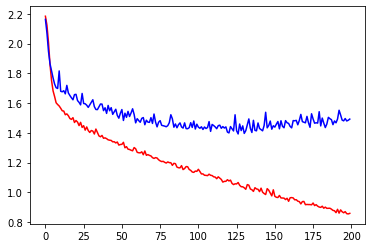

In [10]:
plt.plot(history.history["loss"],color="red")
plt.plot(history.history["val_loss"],color="blue")